#  1.1 导言
在本章中将创建线段图，如图 1-1所示。从一个基本的线段图开始，一步步解释添加到代码中的所有自定义功能。

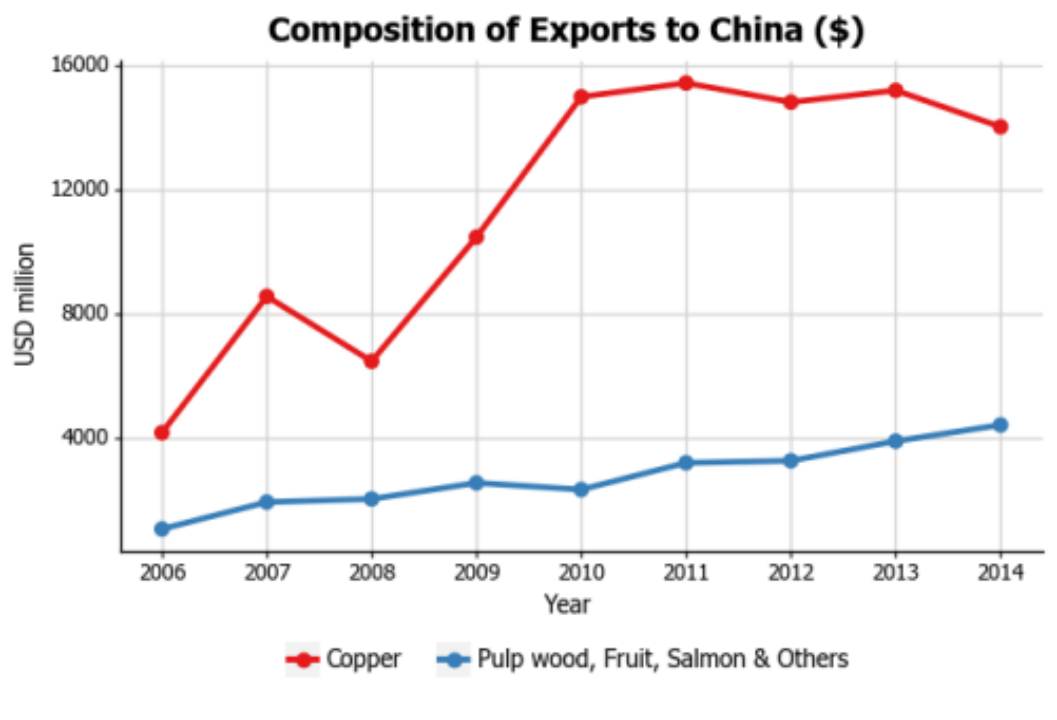


第一步是导入所有需要的软件包。为此，需要：
- pandas和它的DataFrame类来读取和处理数据
- plotnine来获取数据并创建图表
- numpy用于在图形中进行一些基本的数学计算
还可以使用 plotnine 的 figure_size 函数来改变图的大小。在本章中调整了图的大小，使它们显示得更整齐。首先在anaconda中并不包含plotnine，因此需要安装它

In [1]:
import numpy as np
import pandas as pd
import plotnine
plotnine .options .figure_size=(7.5, 4.2)
from plotnine import *
from pandas import DataFrame

e:\Anaconda\pytorch\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
e:\Anaconda\pytorch\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
e:\Anaconda\pytorch\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


在本章节中，整理的贸易数据集， 可以像这样把数据加载到Python中。

In [2]:
copper = pd.read_csv("trade.csv")

## ggplot的基本结构
为了初始化折线图，需要告诉ggplot copper（铜）是数据，并指定X轴绘制年份变量，Y轴绘制export变量，分组变量叫做product。变量放在了一个叫做aes的方法里面。aes是审美映射的简称，它决定了变量将如何被映射到图表的各个部分。正如下面看到的，ggplot已经将年份映射到X轴上，将export映射到Y轴上。 输出图中没有任何东西，如图 1-2所示。为了渲染数据，需要告诉ggplot想如何直观地表现它。

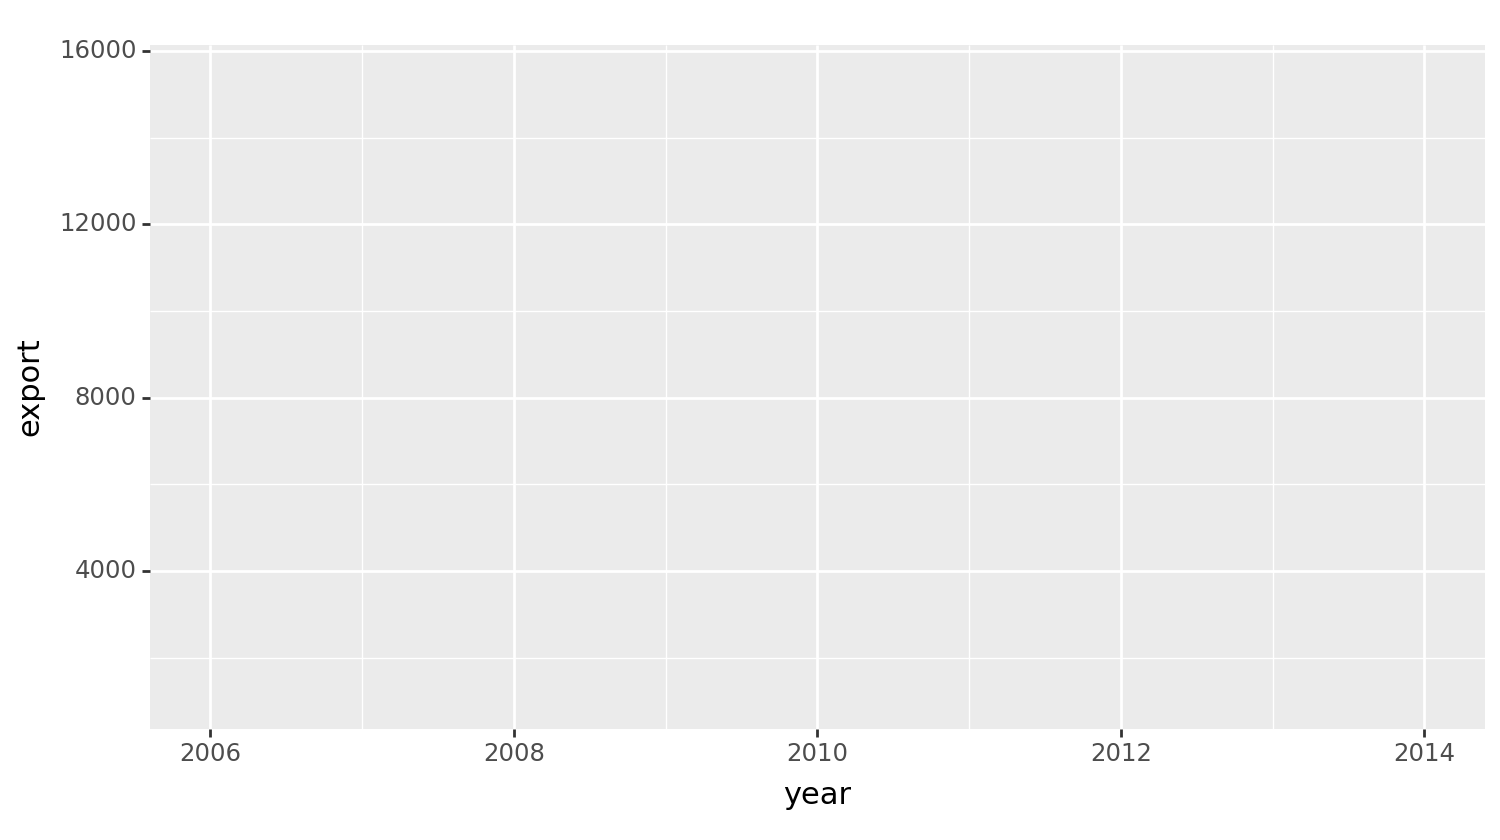

<Figure Size: (750 x 420)>

In [3]:
p1 = ggplot(copper, aes("year", "export", colour="product"))
p1



## 1.3 基本线段图
可以使用 geoms原语来实现这一点。在线段图的情况下，使用geom_line()几何原语的输出，如图 1-3所示。

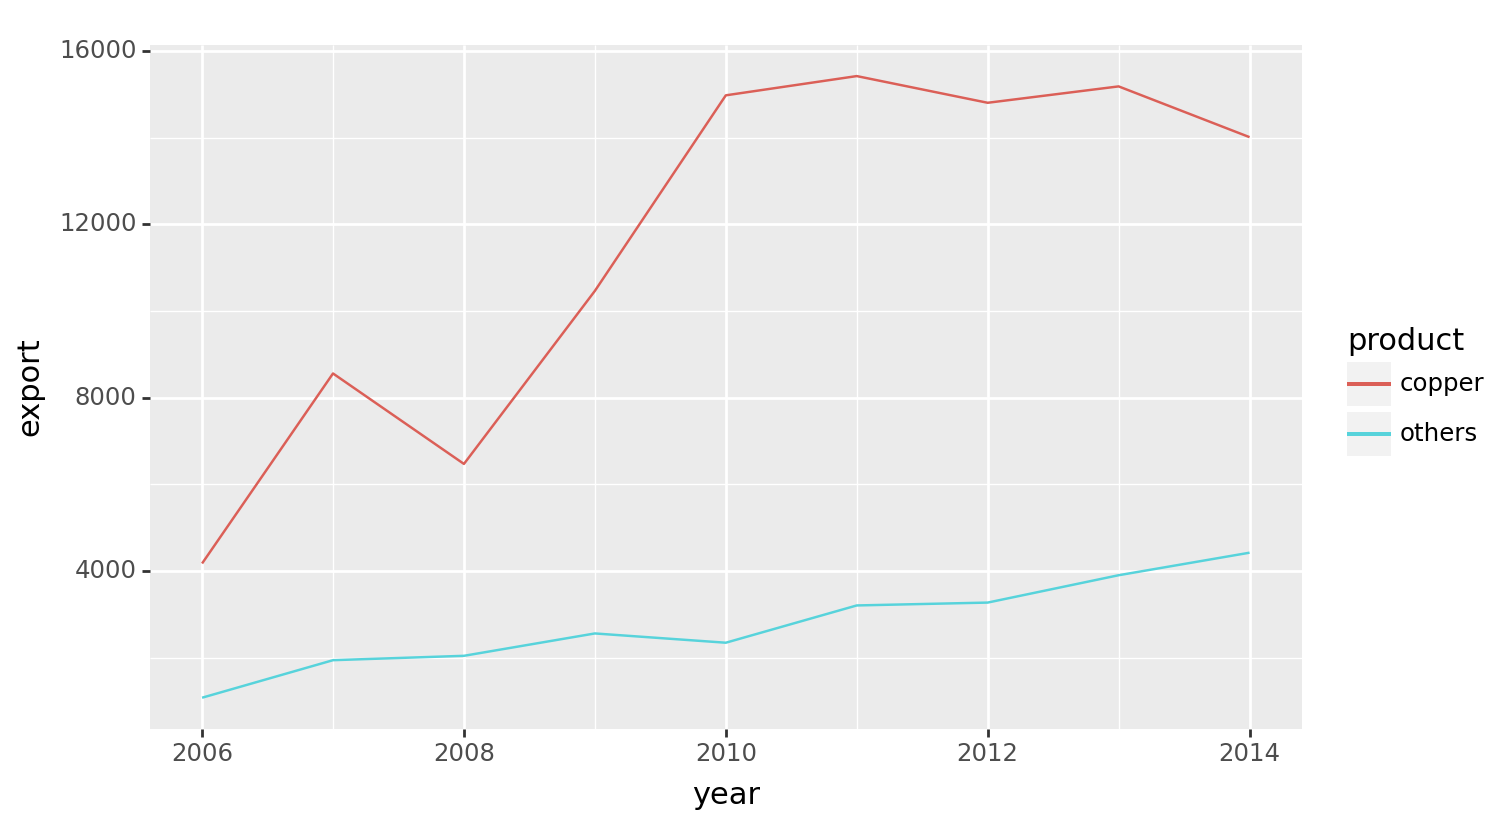

<Figure Size: (750 x 420)>

In [4]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line()
)
p1


## 1.4 调整线宽
为了改变线的宽度，给geom_line添加一个size尺寸参数，如图 1-4所示。

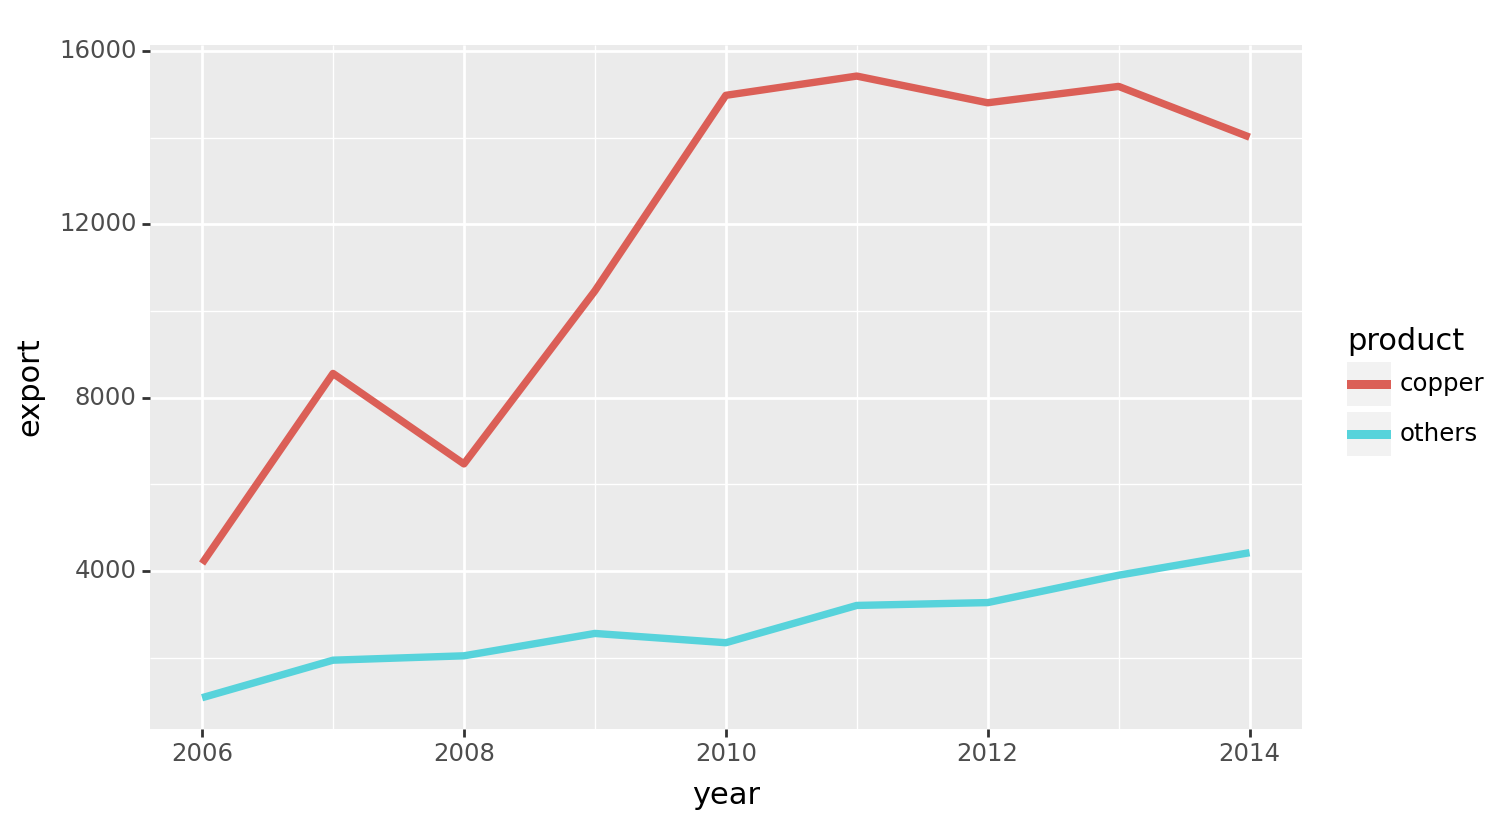

<Figure Size: (750 x 420)>

In [5]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=1.5)
)
p1

## 1.5 改变组别标签
为了改变图例中组的名称，需要重新命名product变量的层次，如图 1-5所示。可以通过创建一个名为 prod_name 的字典来实现，将想要改变的值作为键值对放入。然后将这个字典传递给 replace 方法，确保将 inplace 参数设置为 True，以确保覆盖先前值。

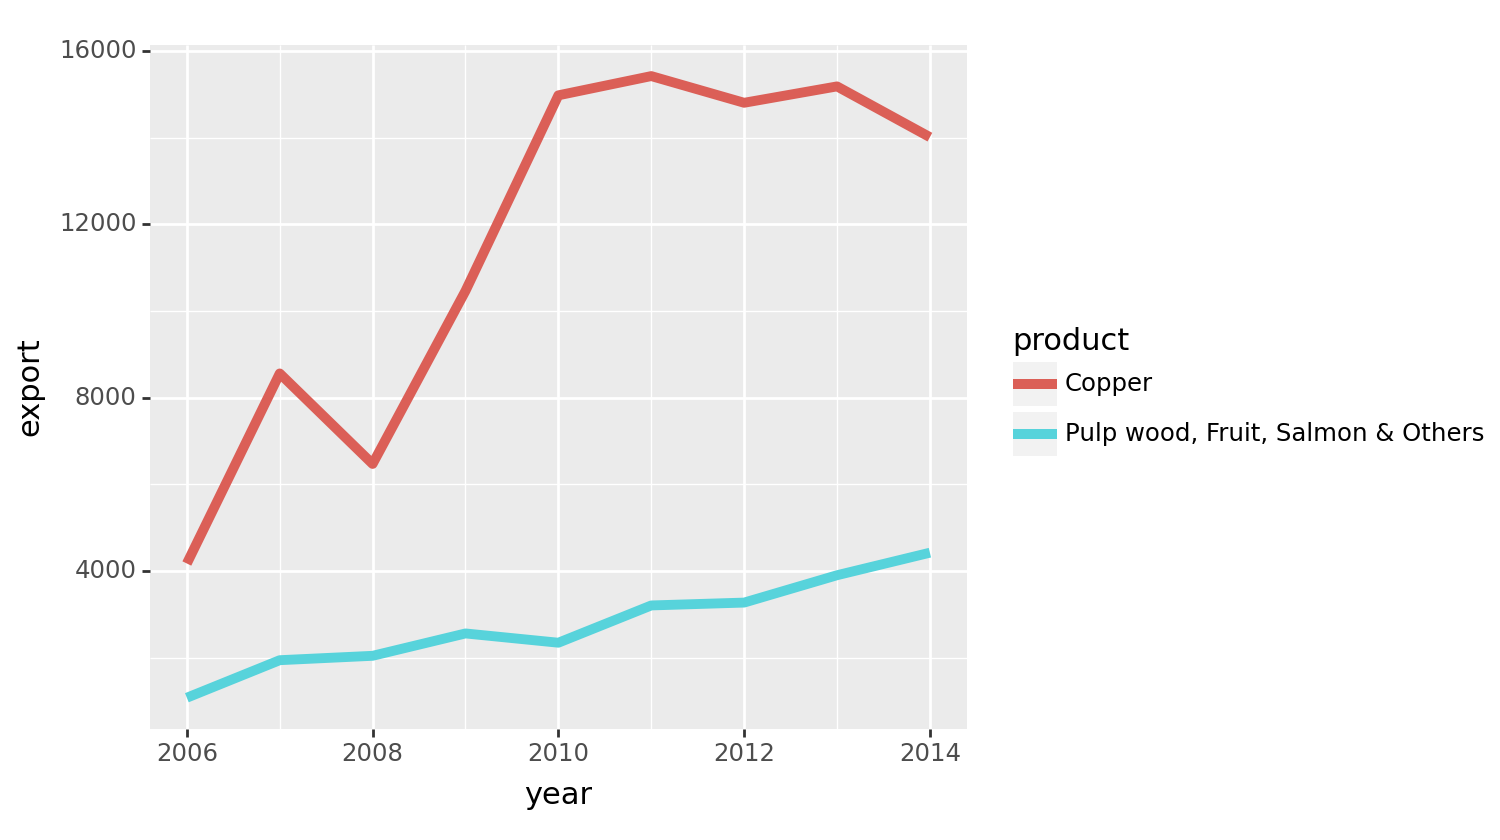

<Figure Size: (750 x 420)>

In [6]:
prod_name = {
"product" : {
"copper" : "Copper",
"others" : "Pulp wood, Fruit, Salmon & Others"
}
}
copper .replace(prod_name, inplace=True)
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=2.0)
)
p1

## 1.6 调整轴的刻度
为了改变x轴的刻度线，使用scale_x_continuous选项，如图 1-6所示。同样地，如果也想改变Y轴，可以使用scale_y_continuous选项。这里将X轴改为每年，而不是每两年。 可以使用break选项来改变断点，该选项需要一个数值列表作为参数可以通过numpy的range函数来缩短手动输入整个列表的时间，可以从指定的数值开始、停止值和步长值中分别生成一个序列。请注意，由于Python的索引功能，在使用np.range时，需要将停止参数设置为比想要的最大值多一。
同样，可以使用limit参数来确定轴的最小和最大值（以列表形式传递），尽管在这个图中没有这样做。

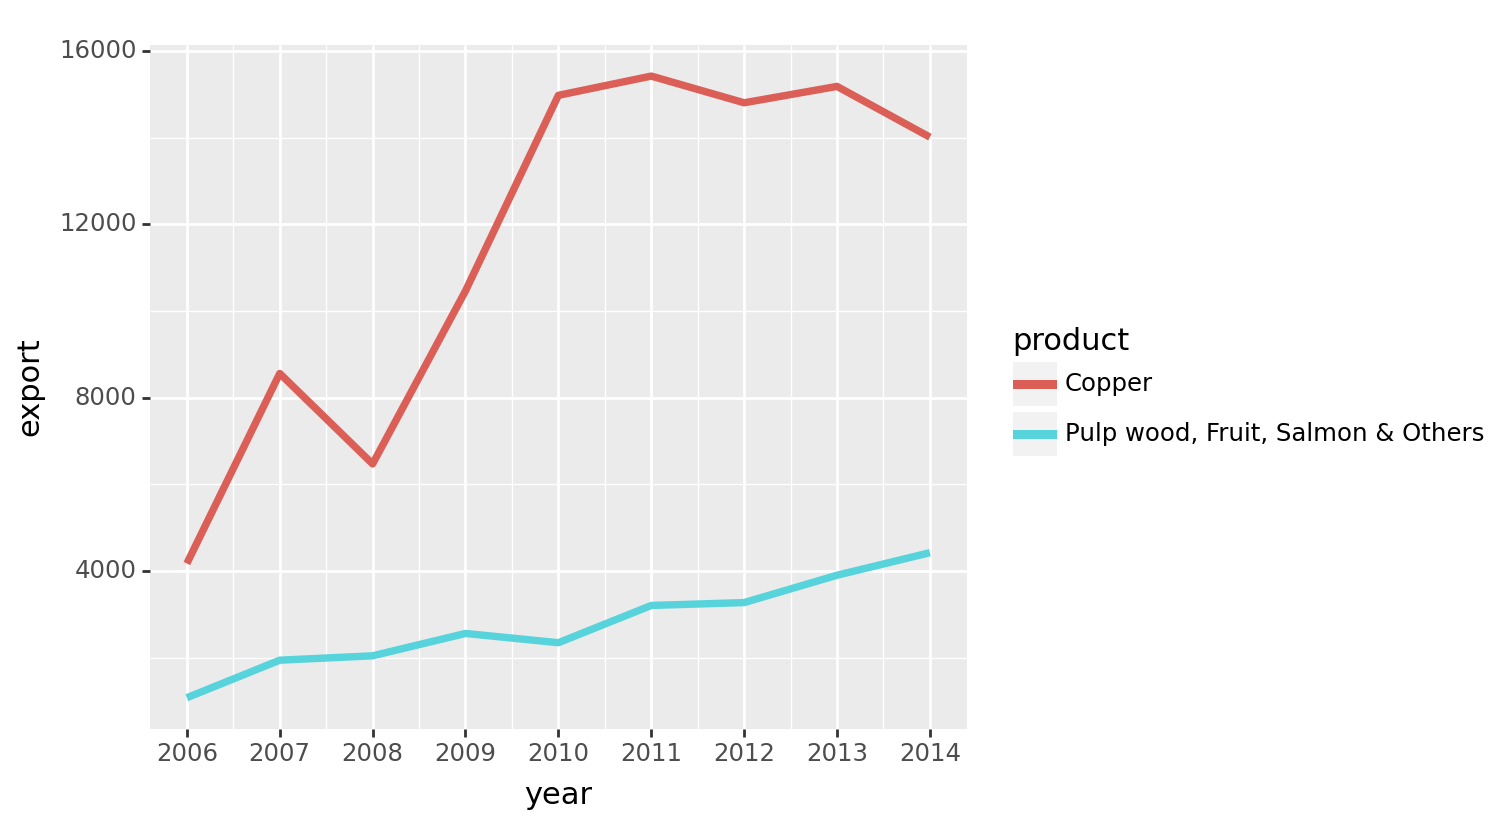

<Figure Size: (750 x 420)>

In [7]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=1.5)
+ scale_x_continuous(breaks=np .arange(2006, 2015, 1))
)
p1


## 1.7 调整轴标签和添加标题
要添加标题，要包括ggtitle选项，并将图形的名称作为一个字符串参数。为了改变轴的名称，同样使用xlab和ylab参数，如图 1-7所示。

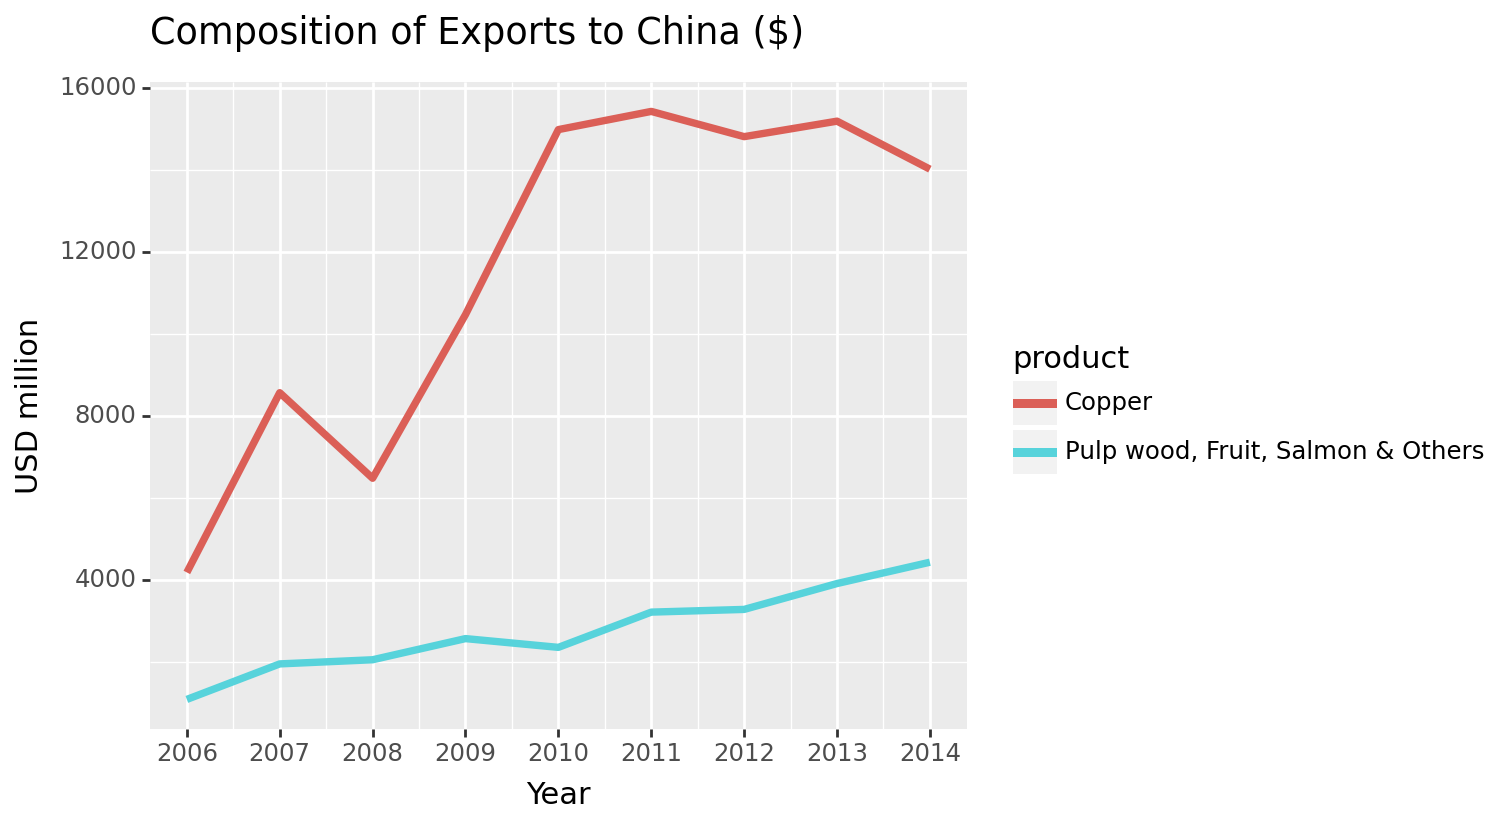

<Figure Size: (750 x 420)>

In [8]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=1.5)
+ scale_x_continuous(breaks=np .arange(2006, 2015, 1))
+ ggtitle("Composition of Exports to China ($)")
+ xlab("Year")
+ ylab("USD million")
)
p1


## 1.8 调整调色板
有几种调整颜色的方法。plotnine 使用 matplotlib 使用的调色板，ggplot 识别matplotlib的全套颜色命名。 让试着把线条改成 Rebecca紫色和金色，如图 1-8所示。

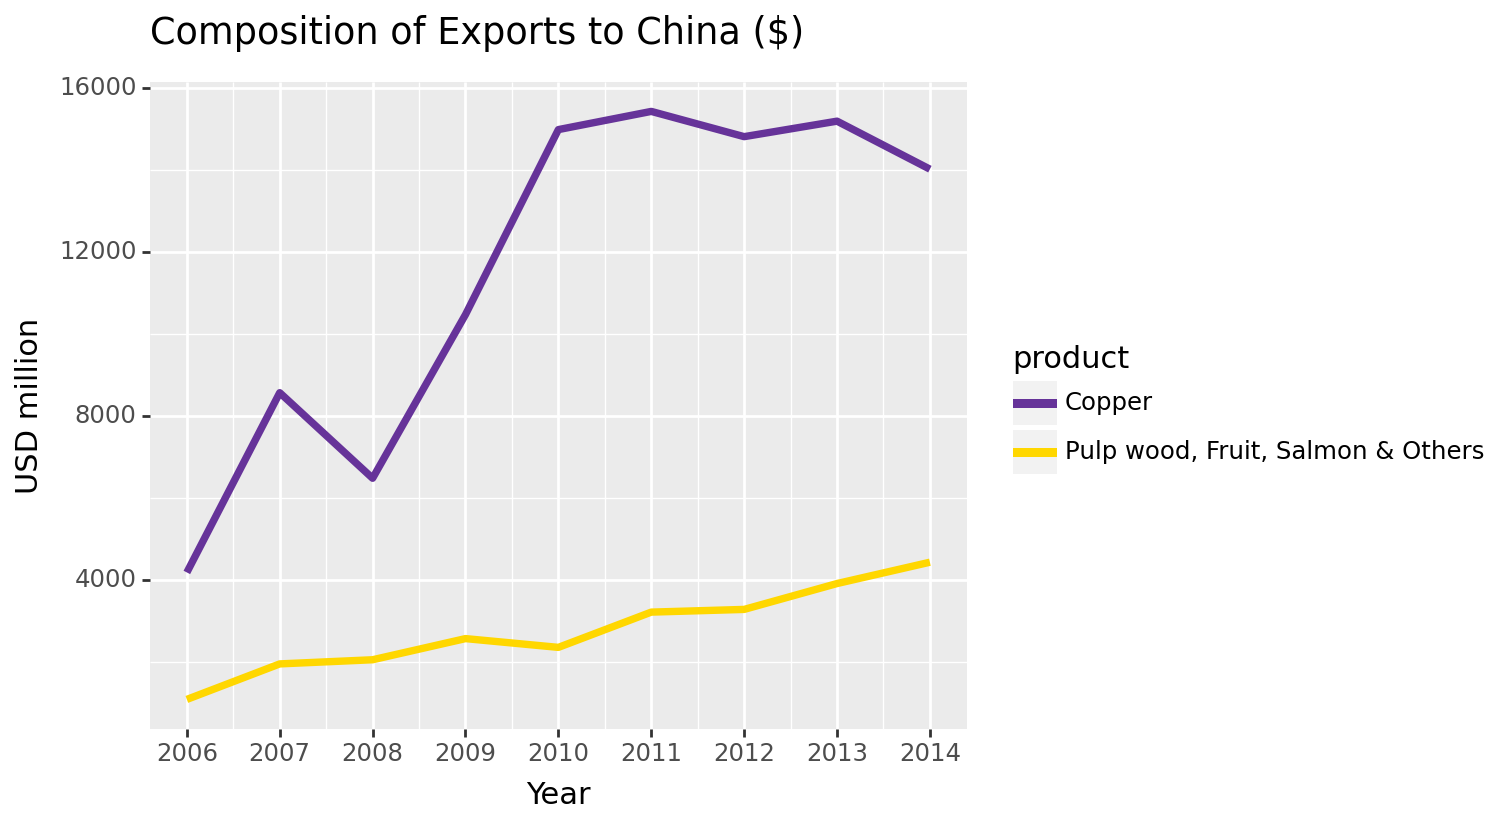

<Figure Size: (750 x 420)>

In [9]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=1.5)
+ scale_x_continuous(breaks=np .arange(2006, 2015, 1))
+ ggtitle("Composition of Exports to China ($)")
+ xlab("Year")
+ ylab("USD million")
+ scale_colour_manual(["rebeccapurple", "gold"])
)
p1

还可以使用特定的HEX代码来改变颜色，把线条颜色改为#5F9EA0和#E1B378，如图 1-9所示。

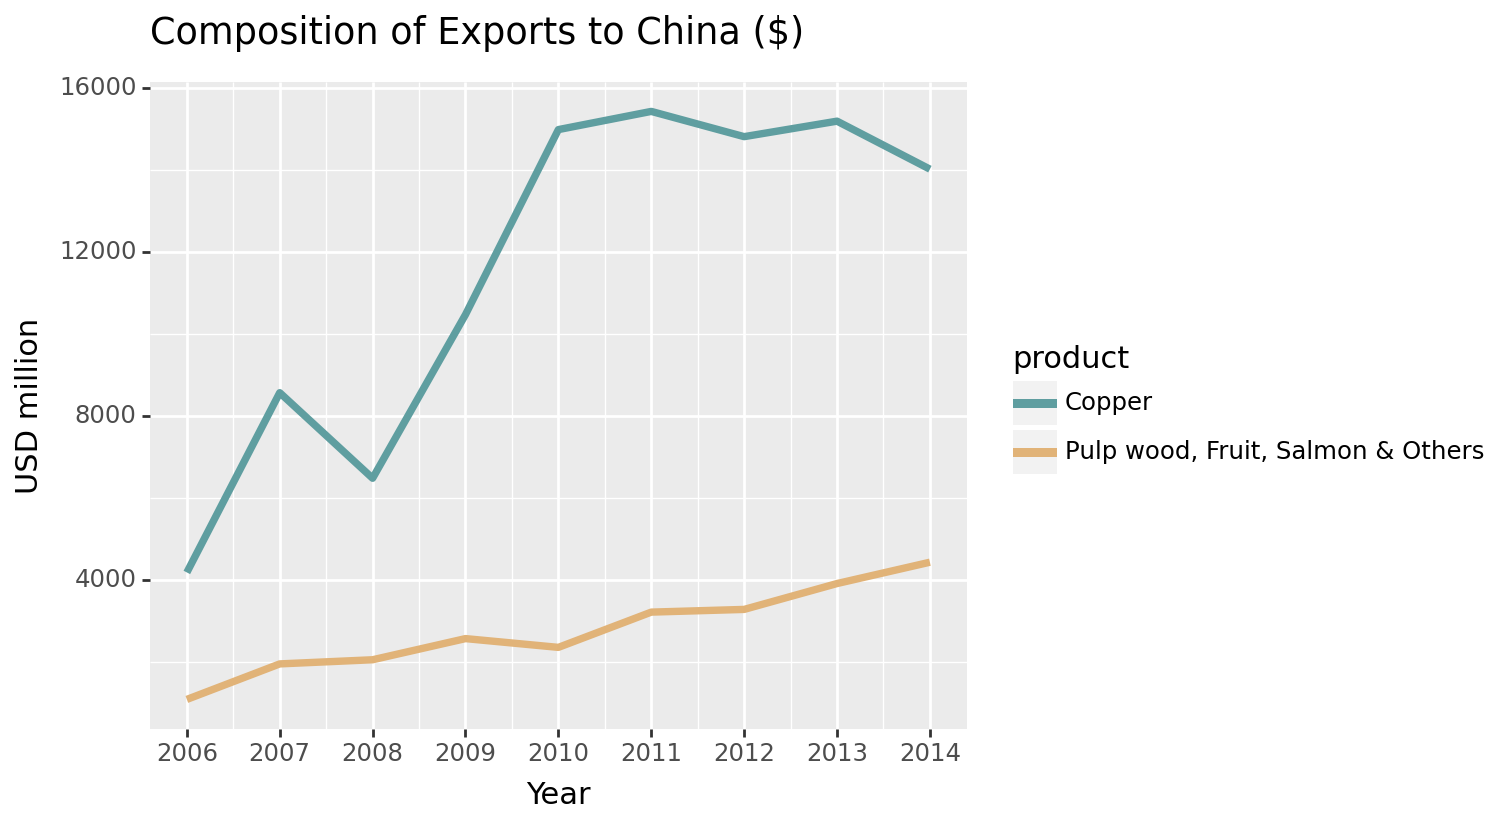

<Figure Size: (750 x 420)>

In [10]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=1.5)
+ scale_x_continuous(breaks=np .arange(2006, 2015, 1))
+ ggtitle("Composition of Exports to China ($)")
+ xlab("Year")
+ ylab("USD million")
+ scale_colour_manual(["#5F9EA0", "#E1B378"])
)
p1

使用手动颜色的一个替代方法是使用ColorBrewer的方案。在这里，使用了scale_colour_brewer选项和比例Accent。

## 1.9 调整图例
为了调整图例的位置，从图形右侧的默认位置开始，添加主题选项并指定参数 legend_position="bottom" 。还可以使用legend_direction="horizontal "参数来改变图例形状。最后，可以使用参数 legend_title_align="center "将图例的标题位置居中，如图 1-10所示。

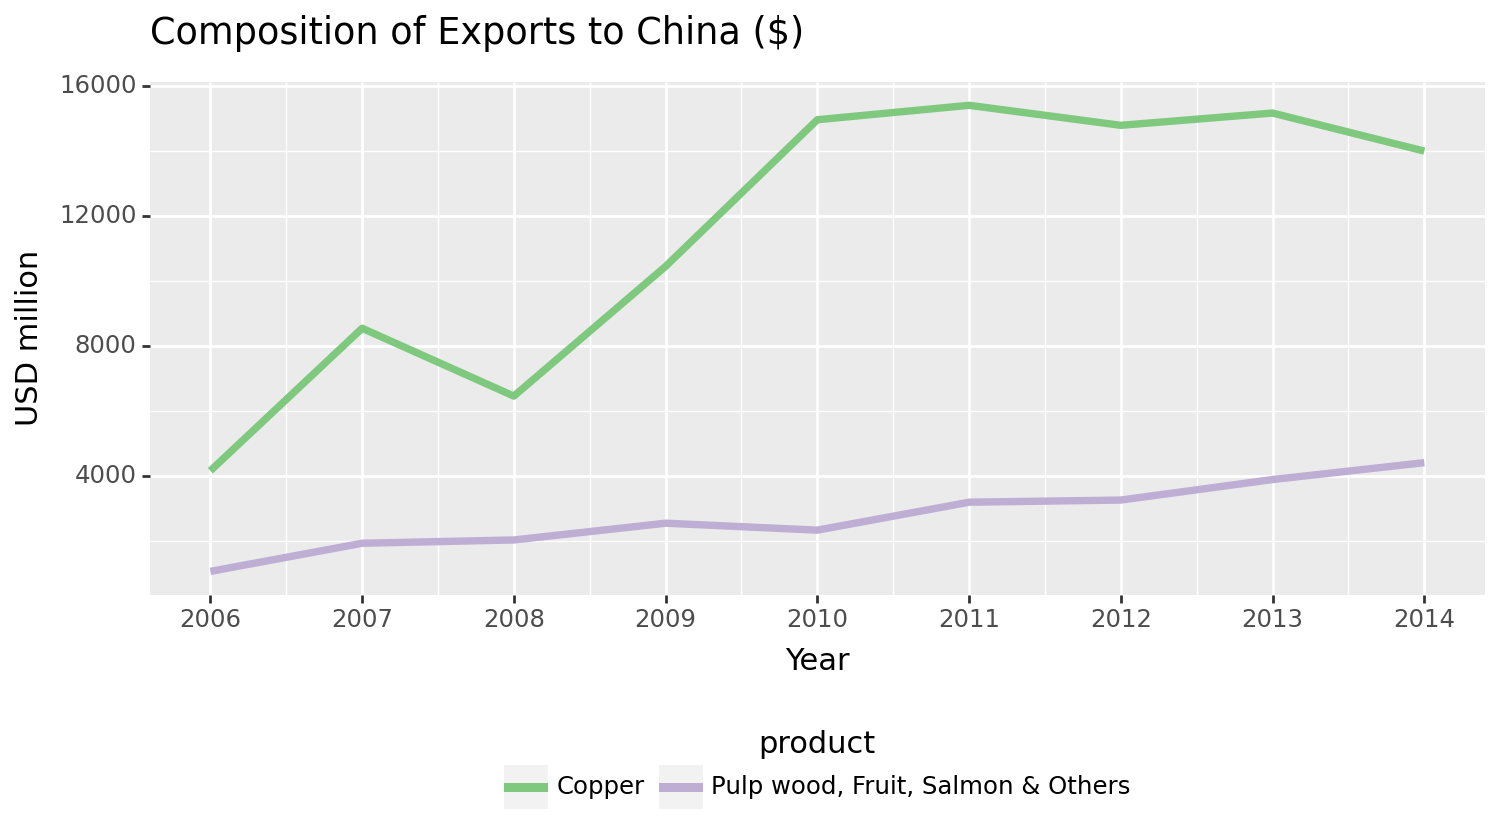

<Figure Size: (750 x 420)>

In [11]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=1.5)
+ scale_x_continuous(breaks=np .arange(2006, 2015, 1))
+ ggtitle("Composition of Exports to China ($)")
+ xlab("Year")
+ ylab("USD million")
+ scale_colour_brewer(type="qual", palette="Accent")
+ theme(
legend_position="bottom",
legend_direction="horizontal",
legend_title_align="center",
)
)
p1

可以通过在theme中添加legend_title的参数element_blank()来去掉图例的标题。如果想改变标题的名称，可以在scale_color_brewer()中添加参数name="Product"。注意，也可以用上面使用的scale_colour_manual()选项来达到目的。

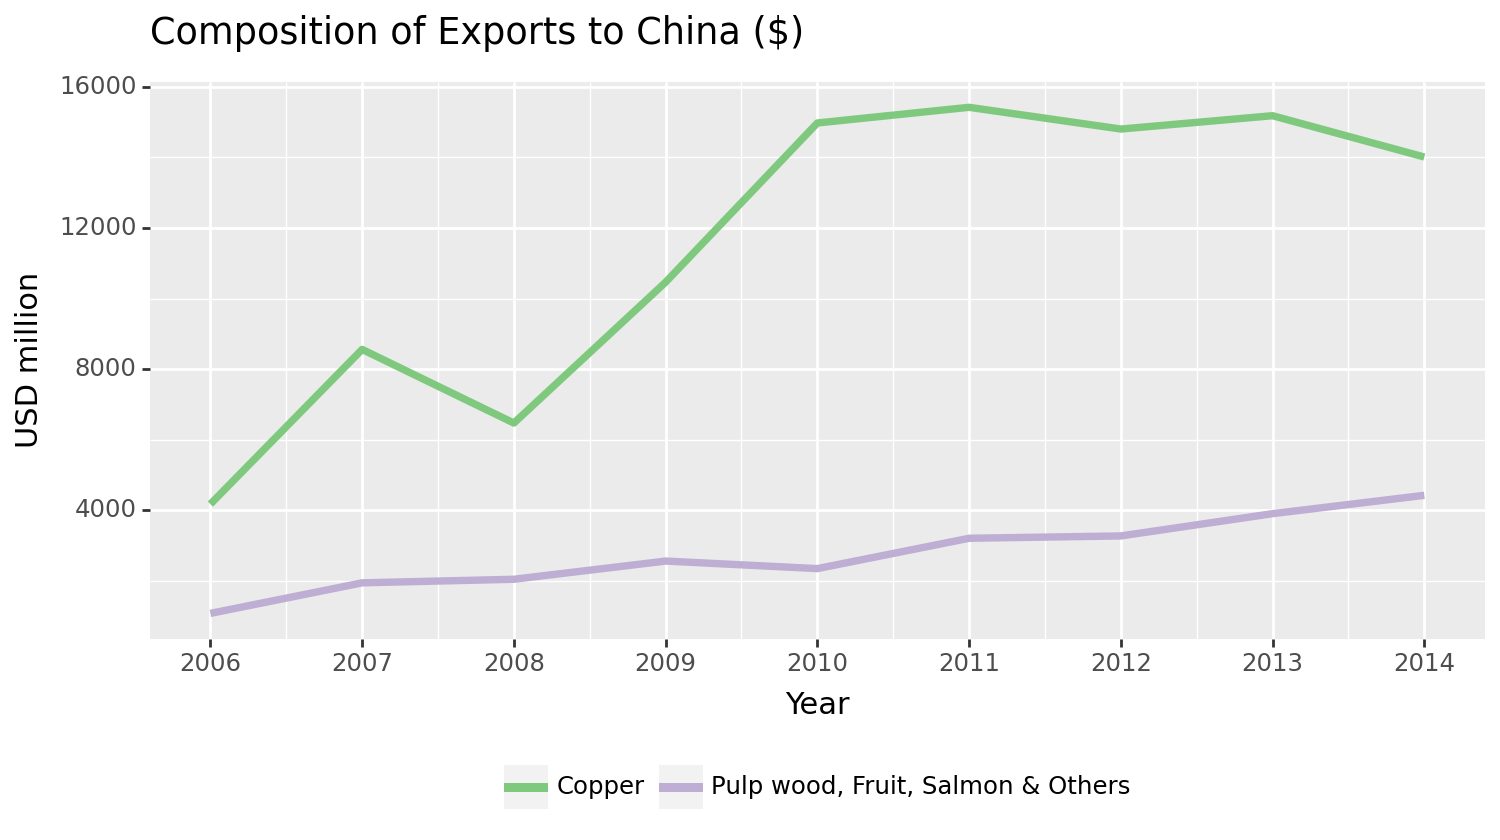

<Figure Size: (750 x 420)>

In [12]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=1.5)
+ scale_x_continuous(breaks=np .arange(2006, 2015, 1))
+ ggtitle("Composition of Exports to China ($)")
+ xlab("Year")
+ ylab("USD million")
+ scale_colour_brewer(type="qual", palette="Accent")
+ theme(
legend_position="bottom",
legend_direction="horizontal",
legend_title_align="center",
legend_title=element_blank(),
)
)
p1

不幸的是，图例现在正位于X轴之上，可以使用主题中的 legend_box_spacing=0.4 选项来调整这个问题，如图 1-11所示。

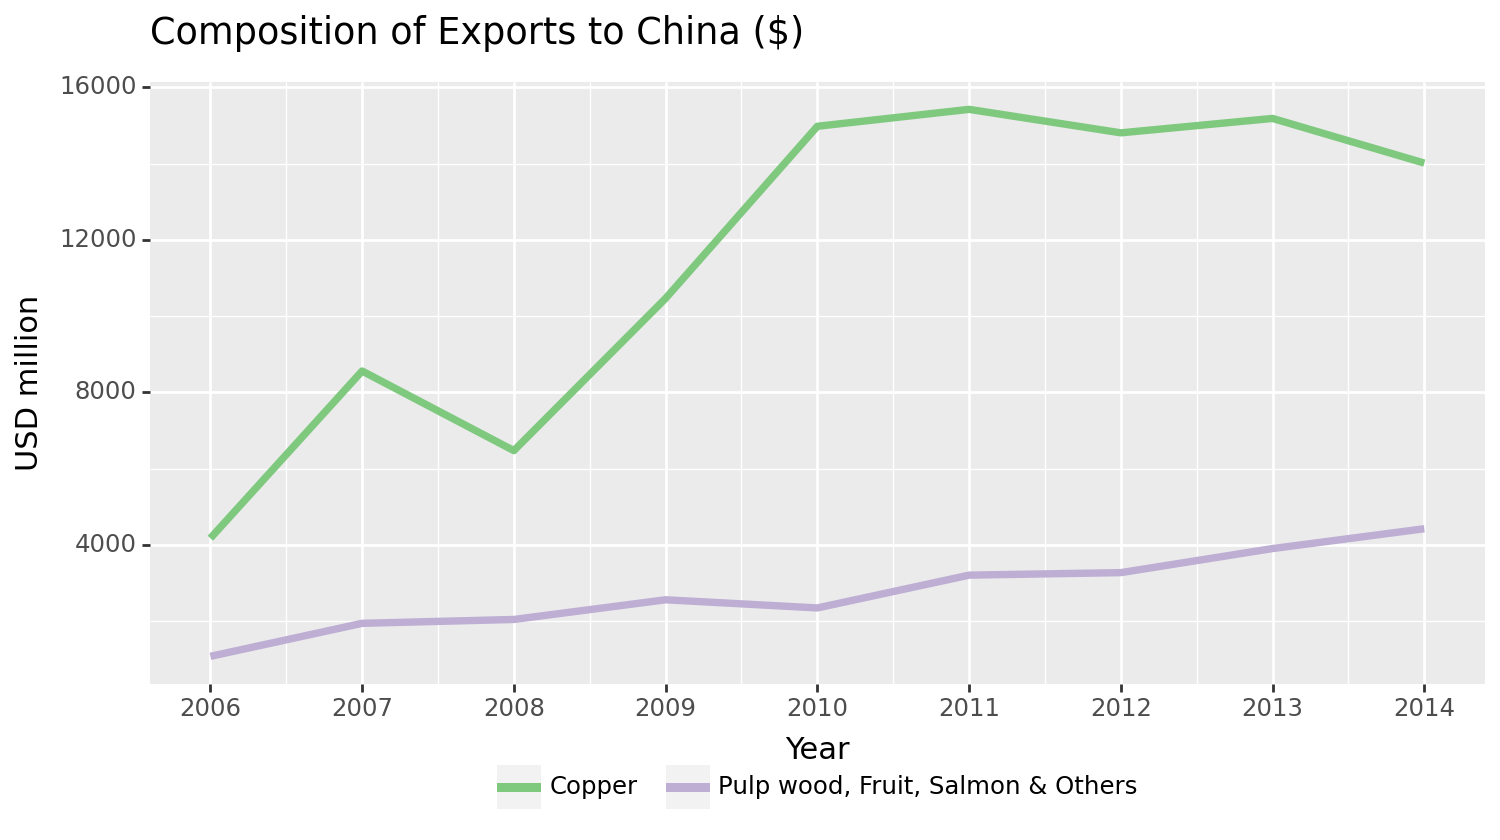

<Figure Size: (750 x 420)>

In [13]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=1.5)
+ scale_x_continuous(breaks=np .arange(2006, 2015, 1))
+ ggtitle("Composition of Exports to China ($)")
+ xlab("Year")
+ ylab("USD million")
+ scale_colour_brewer(type="qual", palette="Accent")
+ theme(
legend_position="bottom",
legend_direction="horizontal",
legend_title_align="center",
legend_box_spacing=0,
legend_entry_spacing_x=10,
legend_title=element_blank(),
)
)
p1

## 1.10 使用白色主题
还可以使用主题来改变图形的整体外观。通过添加 theme_bw() 开始使用一个简单的定制主题，如图 1-13所示。

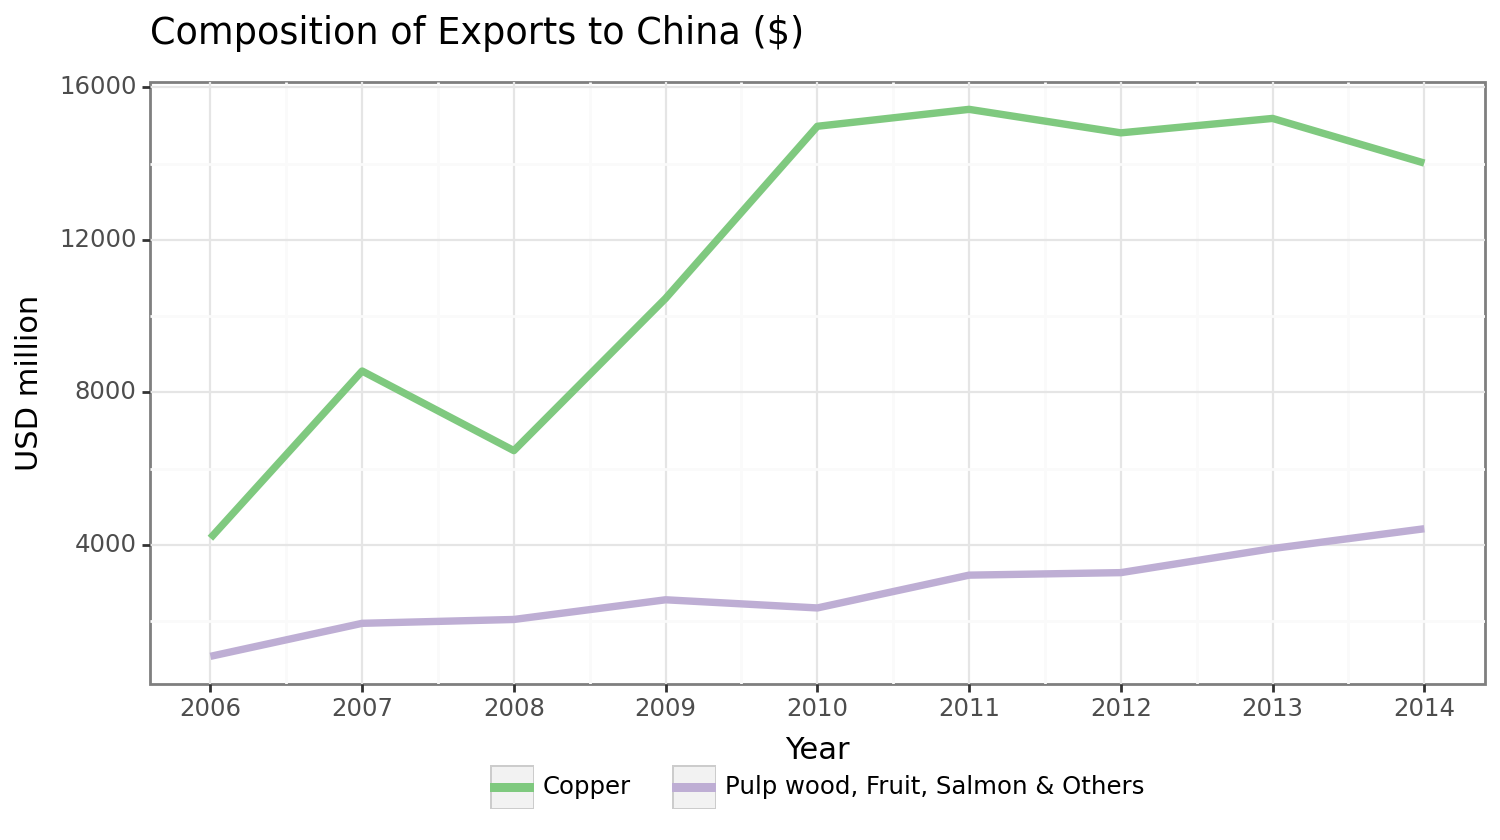

<Figure Size: (750 x 420)>

In [14]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=1.5)
+ scale_x_continuous(breaks=np .arange(2006, 2015, 1))
+ ggtitle("Composition of Exports to China ($)")
+ xlab("Year")
+ ylab("USD million")
+ scale_colour_brewer(type="qual", palette="Accent")
+ theme_bw()
+ theme(
legend_position="bottom",
legend_direction="horizontal",
legend_title_align="center",
legend_box_spacing=0,
legend_entry_spacing_x=15,
legend_title=element_blank(),
)
)
p1

In [15]:
import matplotlib.font_manager as fm
agm = "AtlasGrotesk-Medium.otf"
agr = "AtlasGrotesk-Regular.otf"
dp = "DecimaMonoPro.otf"
# Create font objects
title_text = fm.FontProperties(fname=agm)
legend_text = fm.FontProperties(fname=agr)
axis_text = fm.FontProperties(fname=agr)
body_text = fm.FontProperties(fname=dp)

In [16]:
# Alter size and weight of font objects
title_text .set_size(16)
legend_text .set_size(10)
axis_text .set_size(12)
body_text .set_size(10)

In [17]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=1.5)
+ scale_x_continuous(breaks=np .arange(2006, 2015, 1))
+ ggtitle("Composition of Exports to China ($)")
+ xlab("Year")
+ ylab("USD million")
+ scale_colour_manual(["#FF2700", "#008FD5"])
+ theme_538()
+ theme(
axis_title=element_text(fontproperties=axis_text),
legend_position="bottom",
legend_direction="horizontal",
legend_box_spacing=0,
legend_title=element_blank(),
legend_text=element_text(fontproperties=legend_text),
plot_title=element_text(fontproperties=title_text),
text=element_text(fontproperties=body_text),
)
)
p1

RuntimeError: In draw_glyphs_to_bitmap: Could not convert glyph to bitmap (cannot open resource; error code 0x1)

<Figure size 750x420 with 1 Axes>

<Figure Size: (750 x 420)>

: 

## 1.13 创建自己的主题
现在已经探索了图表定制中的一些选项，现在可以建立完全定制的图表，如图 1-15所示。
•改变 axis_line 的大小和颜色参数，可以加粗线条并将其颜色改为黑色。
•改变传递给 panel_grid_major 的颜色参数意味着所有的主要网格线现在都是浅灰色。
•同样，通过改变 panel_grid_minor、panel_border 和 panel_background 的参数来移除次要网格线和背景。
•使用标准字体Tahoma来改变字体。 将颜色方案改为另一个ColorBrewer主题。

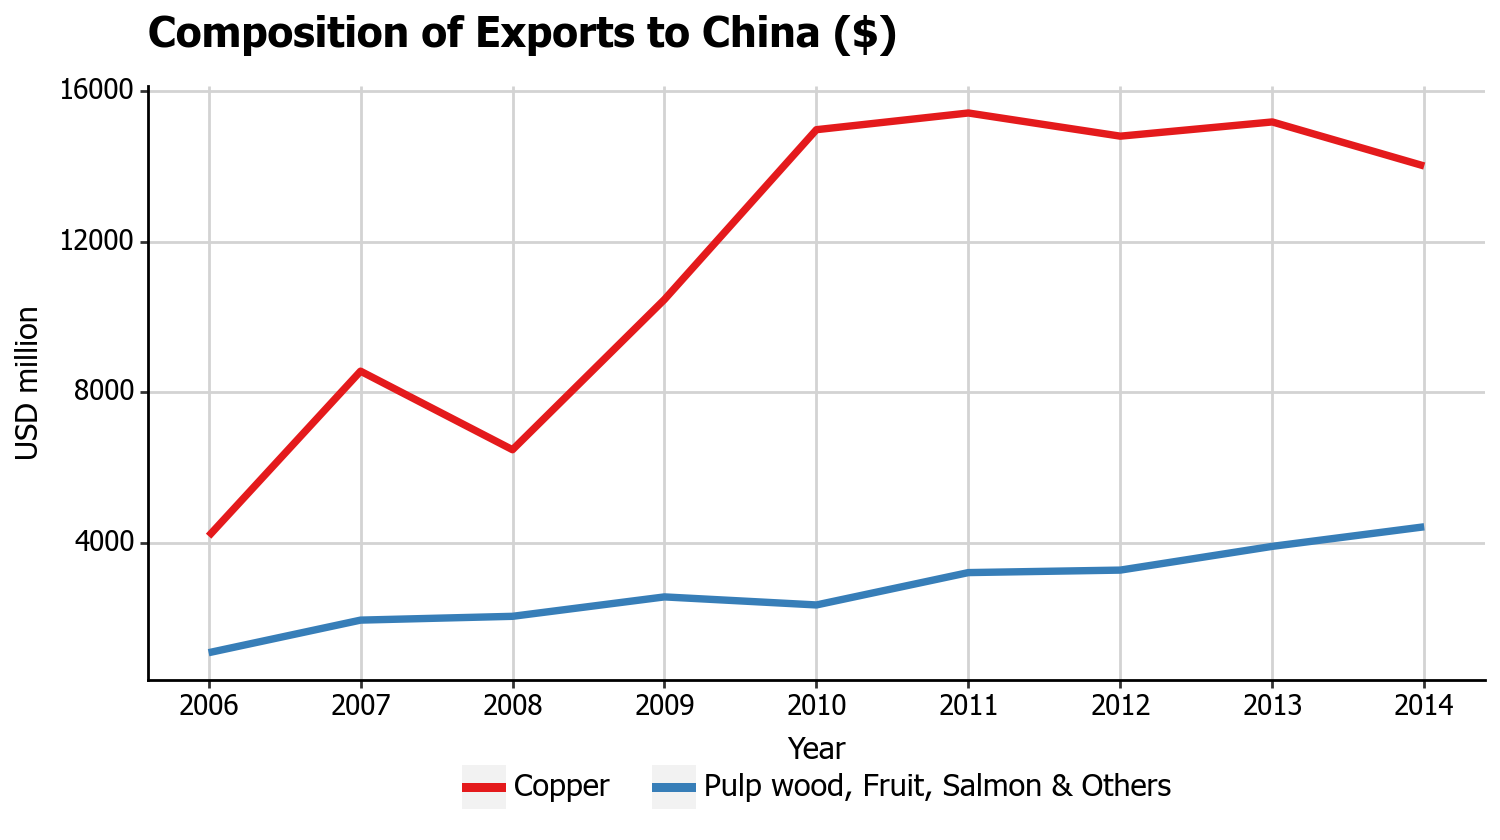

<Figure Size: (750 x 420)>

In [ ]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))
+ geom_line(size=1.5)
+ scale_x_continuous(breaks=np .arange(2006, 2015, 1))
+ ggtitle("Composition of Exports to China ($)")
+ xlab("Year")
+ ylab("USD million")
+ scale_colour_brewer(type="qual", palette="Set1")
+ theme(
legend_position="bottom",
legend_direction="horizontal",
legend_box_spacing=0,
legend_entry_spacing_x=15,
legend_title=element_blank(),
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p1

最后，用了geom_point(size=3)原语添加点来创建一个标记线。

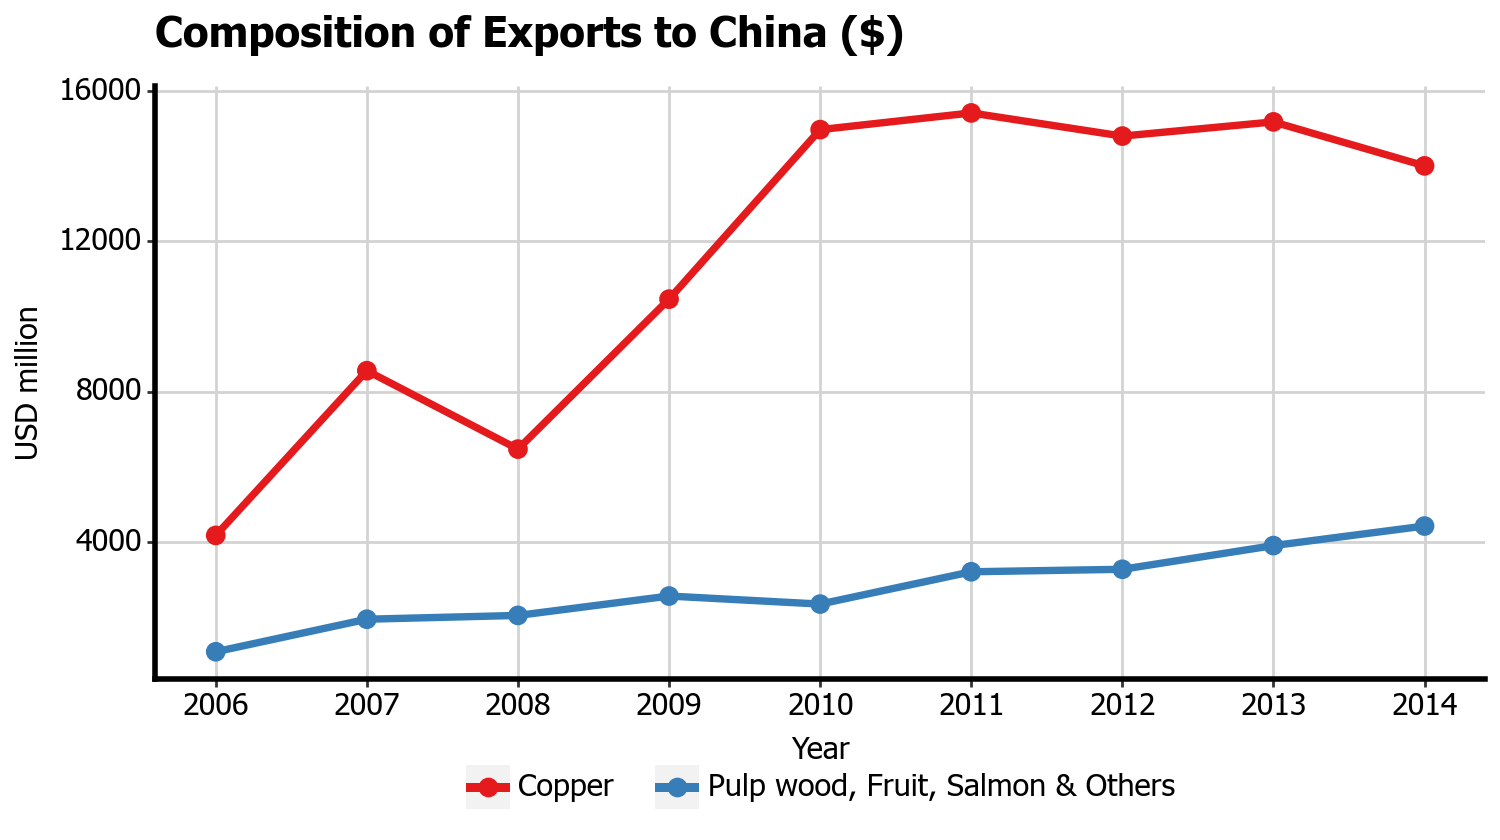

<Figure Size: (750 x 420)>

In [ ]:
p1 = (
ggplot(copper, aes("year", "export", colour="product"))  #(导入数据中大的)year作x变量  export作y变量  colour表示分组变量名
+ geom_line(size=1.5)  #线宽
+ geom_point(size=3)   #标点大小
+ scale_x_continuous(breaks=np .arange(2006, 2015, 1))   #设置x轴取值
+ ggtitle("Composition of Exports to China ($)")   #标题
+ xlab("Year")    #x轴名字
+ ylab("USD million")  #y轴名字
+ scale_colour_brewer(type="qual", palette="Set1")   #设置颜色主题
+ theme(    #创建主题
legend_position="bottom",    #图例位置
legend_direction="horizontal",  #图例方向 竖直or水平
legend_box_spacing=0,   #设置图例位置
legend_entry_spacing_x=15,
legend_title=element_blank(),    #图例标题要不要
axis_line=element_line(size=2, colour="black"),   #坐标轴
panel_grid_major=element_line(colour="#d3d3d3"), 
panel_grid_minor=element_blank(),  #移除次要网格线 背景
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),    #改变字体
text=element_text(family="Tahoma", size=11), 
axis_text_x=element_text(colour="black", size=11),    #改变刻度文字样式
axis_text_y=element_text(colour="black", size=11),
)
)
p1


通过所有这些定制，现在终于有了本章开始时提出的图表。